# config

In [1]:

!pip install git+https://github.com/philipperemy/keras-tcn.git@master


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/philipperemy/keras-tcn.git (to revision master) to /tmp/pip-req-build-_ls7d1k_
  Running command git clone -q https://github.com/philipperemy/keras-tcn.git /tmp/pip-req-build-_ls7d1k_
     |████████████████████████████████| 1.1 MB 12.8 MB/s 
  Created wheel for keras-tcn: filename=keras_tcn-3.4.4-py3-none-any.whl size=13744 sha256=c596e37cabab2dba3cf381ca812cd0f369d439108fd9913a030761fdbe068779
  Stored in directory: /tmp/pip-ephem-wheel-cache-8044eibx/wheels/3a/fc/89/246d0373172708e0d1f0248fac960ff98c31ddd05f3f56390c
Successfully built keras-tcn


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow as tf
from tcn.tcn import TCN

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle/' #注意kaggle文件夹包含json文件
 
os.chdir('/content/drive/MyDrive/kaggle/') #切换到kaggle文件夹

Mounted at /content/drive


In [17]:
milk = pd.read_csv('/content/drive/MyDrive/Network Analytics.csv', index_col=0, parse_dates=True)

print(milk.head())
milk = milk.values  # just keep np array here for simplicity.

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                 96.2442
2017-10-10 07:21:00                 99.1131
2017-10-10 07:26:00                 97.2892
2017-10-10 07:31:00                 98.0286
2017-10-10 07:36:00                 99.5263


In [37]:
from keras.callbacks import History 
history = History()

# 1 step pred

(25567, 64, 1)
(25567, 1)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_41 (TCN)                (None, 64)                91136     
                                                                 
 dense_48 (Dense)            (None, 1)                 65        
                                                                 
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/10
799/799 - 8s - loss: 15.7708 - 8s/epoch - 9ms/step
Epoch 2/10
799/799 - 6s - loss: 7.3444 - 6s/epoch - 8ms/step
Epoch 3/10
799/799 - 7s - loss: 6.6029 - 7s/epoch - 9ms/step
Epoch 4/10
799/799 - 5s - loss: 6.3722 - 5s/epoch - 6ms/step
Epoch 5/10
799/799 - 5s - loss: 6.3899 - 5s/epoch - 6ms/step
Epoch 6/10
799/799 - 5s - loss: 6.0884 - 5s/epoch - 6ms/step
Epoch 7/10
799/799 - 5s - loss: 6.0572 - 5s

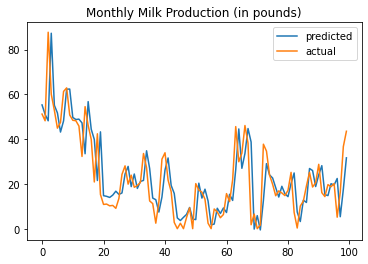

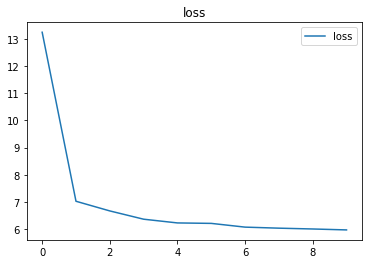

In [61]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line


##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##



lookback_window = 64  # months.



x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

# noinspection PyArgumentEqualDefault
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model.summary()
model.compile('adam', 'mae',)

print('Train...')
model.fit(x, y, epochs=10, verbose=2, callbacks=[history])

p = model.predict(x)

p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()



In [ ]:
x.shape,y.shape

# try merge curve

(25567, 64, 1)
(25567, 1)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_42 (TCN)                (None, 64)                181376    
                                                                 
 dense_49 (Dense)            (None, 1)                 65        
                                                                 
Total params: 181,441
Trainable params: 181,441
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/10
799/799 - 8s - loss: 16.2717 - 8s/epoch - 10ms/step
Epoch 2/10
799/799 - 5s - loss: 7.2780 - 5s/epoch - 7ms/step
Epoch 3/10
799/799 - 5s - loss: 6.5358 - 5s/epoch - 7ms/step
Epoch 4/10
799/799 - 5s - loss: 6.2138 - 5s/epoch - 7ms/step
Epoch 5/10
799/799 - 5s - loss: 6.0308 - 5s/epoch - 7ms/step
Epoch 6/10
799/799 - 5s - loss: 5.9372 - 5s/epoch - 7ms/step
Epoch 7/10
799/799 - 5s - loss: 5.8690 -

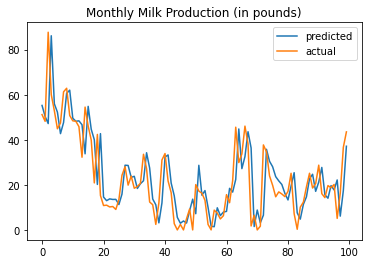

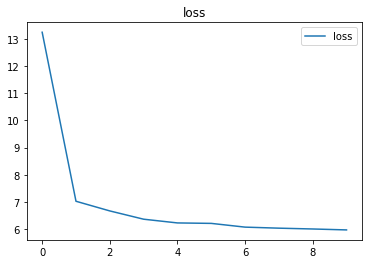

In [62]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line


##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##

lookback_window = 64  # months.



x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

# noinspection PyArgumentEqualDefault
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=4,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=10, verbose=2, callbacks=[history])

p = model.predict(x)

p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()


# try to concatenate


(25567, 64, 1)
(25567, 1)
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 64, 1)]      0           []                               
                                                                                                  
 input2 (InputLayer)            [(None, 64, 1)]      0           []                               
                                                                                                  
 tcn_43 (TCN)                   (None, 64)           181376      ['input1[0][0]']                 
                                                                                                  
 tcn_44 (TCN)                   (None, 64)           91136       ['input2[0][0]']                 
                                                                  

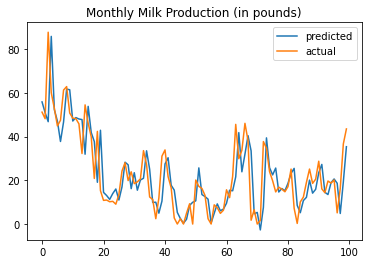

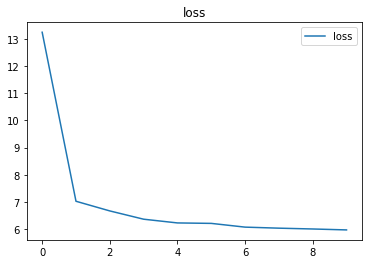

In [63]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line


##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##

lookback_window = 64  # months.



x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

# noinspection PyArgumentEqualDefault

input1_= tf.keras.Input(shape=(lookback_window, 1), name='input1')
input2_ = tf.keras.Input((lookback_window, 1), name='input2')


input1 = TCN(
        kernel_size=4,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        )(input1_)
large_size_model = Dense(1, activation='linear')(input1)
input2 = TCN(
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        )(input2_)
small_size_model = Dense(1, activation='linear')(input2)
added = tf.keras.layers.concatenate([large_size_model, small_size_model])


model_output = Dense(1, activation='linear')(added)





model =  tf.keras.models.Model(inputs=[input1_,input2_], outputs=model_output)

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit([x,x], y, epochs=10, verbose=2, callbacks=[history])

p = model.predict([x,x])

p = p[:100]
y = y[:100]
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


plt.plot(history.history['loss'][:10])
plt.title('loss')
plt.legend(['loss',])
plt.show()


# 3 muti step pred test

In [ ]:

milk = pd.read_csv('/content/Network Analytics2.csv', index_col=0, parse_dates=True)

print(milk.head())

lookback_window = 12  # months.
pred_window = 3  # months.

milk = milk.values # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)-pred_window,pred_window):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i:i+pred_window])

x,y
x = np.array(x,dtype=object).astype(np.float32)
y = np.array(y,dtype=object).astype(np.float32)
y = y.squeeze()





np.set_printoptions(threshold=5)
print(x.shape)
print(y.shape)

In [ ]:

# noinspection PyArgumentEqualDefault
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(pred_window, activation='linear')
])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=100, verbose=2)


In [ ]:

p = model.predict(x)
p = p.flatten()
y = y.flatten()
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
x.shape,y.shape

# TCN summary
## 1.  训练集即测试集（仅仅是过拟合）
## 2.  3-step-tcn 是将3步变成三维进行预测，从原理上有点小问题，即通过1-12预测13-15；但最好还是return_sequence = true,然后迭代预测，此时也是通过1-12预测13-15，没有新的点加入（即非自回归预测模型 ACF PACF）。

# lstm 1 step

![Imgur](https://i.imgur.com/FAGMvlc.png)
https://en.wikipedia.org/wiki/Long_short-term_memory

hidden state(also known as output of lstm units)restricted from minus one to one!!

In [ ]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [ ]:

milk = pd.read_csv('/content/Network Analytics2.csv', index_col=0, parse_dates=True)
milk = normalization(milk)  #数据标准归一化
print(milk.head())

lookback_window = 12  # months.

milk = milk.values  # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


In [ ]:

# noinspection PyArgumentEqualDefault
model = Sequential([tf.keras.layers.LSTM(1,input_shape=(lookback_window, 1))

])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=100, verbose=2)


In [ ]:

p = model.predict(x)

plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()

因为只有12个可调参数，根本学习不到特征


# lstm 3 step

In [ ]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return ((data - np.min(data)) / _range)

In [ ]:

milk = pd.read_csv('/content/Network Analytics2.csv', index_col=0, parse_dates=True)
milk = normalization(milk)  #数据标准归一化
print(milk.head())

lookback_window = 12  # months.
pred_window = 3  # months.

milk = milk.values # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)-pred_window,pred_window):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i:i+pred_window])

x,y
x = np.array(x,dtype=object).astype(np.float32)
y = np.array(y,dtype=object).astype(np.float32)
y = y.squeeze()





np.set_printoptions(threshold=5)
print(x.shape)
print(y.shape)

In [ ]:

# noinspection PyArgumentEqualDefault
model = Sequential([tf.keras.layers.LSTM(3,input_shape=(lookback_window, 1))

])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x, y, epochs=100, verbose=2)


In [ ]:

p = model.predict(x)
p = p.flatten()
y = y.flatten()
plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()